<a href="https://colab.research.google.com/github/StetskoSergey/pida5_stetsko/blob/master/stats_dz_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №3

In [0]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [0]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [0]:
data = data.dropna(subset = ['Direct_Bilirubin', 'Albumin_and_Globulin_Ratio','Dataset'])

In [0]:
from sklearn.linear_model import LinearRegression
Direct_Bilirubin = data['Direct_Bilirubin']
Total_Bilirubin = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(Total_Bilirubin).reshape(-1,1), Direct_Bilirubin)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.18116743679724934
slope: [0.39557996]


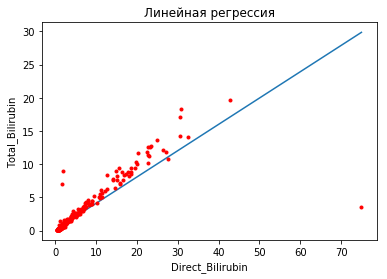

In [0]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(Total_Bilirubin), max(Total_Bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(Total_Bilirubin, Direct_Bilirubin, 'r.')
plt.show()

In [0]:
print(model.predict([[5.5]]))
print(model.predict([[0.1]]))
print(model.predict([[0.4]]))
print(model.predict([[10]]))

[2.35685723]
[0.22072543]
[0.33939942]
[4.13696706]


Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

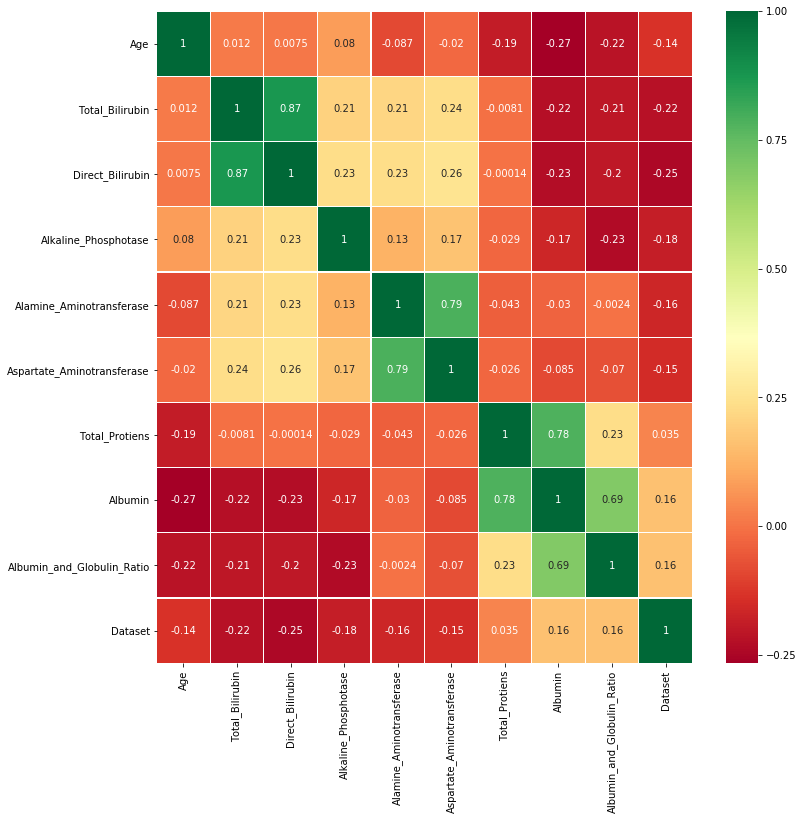

In [0]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [0]:
выбираем параметры Direct_Bilirubin, Albumin_and_Globulin_Ratio	- так как они имеют самую высокую коррелляцию

In [0]:
Direct_Bilirubin = data['Direct_Bilirubin']
Albumin_and_Globulin_Ratio = data['Albumin_and_Globulin_Ratio']

Dataset = data['Dataset']
x = np.vstack([np.array(Direct_Bilirubin), np.array(Albumin_and_Globulin_Ratio)]).T

print('x - это двумерная матрица, где колонки - это Direct_Bilirubin и Albumin_and_Globulin_Ratio : ')
print(x[:3])
y = np.array(Dataset)
model = LinearRegression().fit(x, y)

x - это двумерная матрица, где колонки - это Direct_Bilirubin и Albumin_and_Globulin_Ratio : 
[[0.1  0.9 ]
 [5.5  0.74]
 [4.1  0.89]]


In [0]:
def srav(row):
  tt = data.loc[row, ['Direct_Bilirubin', 'Albumin_and_Globulin_Ratio']].values
  print(tt) 
  otv = model.predict([tt])
  real = data.loc[row, ['Dataset']].values
  print(f'Предсказание - {otv} при реальном значении {real} ')
  
srav(50)
srav(100)
srav(150)
srav(200)
srav(250)

[0.2 0.7]
Предсказание - [1.28974988] при реальном значении [1] 
[0.2 0.76]
Предсказание - [1.29980908] при реальном значении [2] 
[0.5 1.2]
Предсказание - [1.36286737] при реальном значении [2] 
[0.1 0.9]
Предсказание - [1.32685028] при реальном значении [1] 
[1.3 0.8]
Предсказание - [1.26724818] при реальном значении [1] 


Посчитать квартили для всех колонок. 

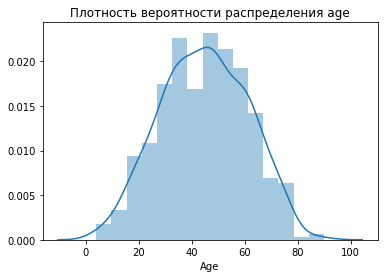

In [0]:
age = data['Age']
sns.distplot(age)
plt.title('Плотность вероятности распределения age')
plt.show()

In [0]:
print("age : ", len(age))  
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

age :  579
Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


In [0]:
data.quantile(0.20, axis = 0)

Age                            31.0
Total_Bilirubin                 0.7
Direct_Bilirubin                0.2
Alkaline_Phosphotase          167.6
Alamine_Aminotransferase       21.0
Aspartate_Aminotransferase     23.0
Total_Protiens                  5.6
Albumin                         2.5
Albumin_and_Globulin_Ratio      0.7
Dataset                         1.0
Name: 0.2, dtype: float64

In [0]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,61.0,87.0,7.2,3.8,1.100,2.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

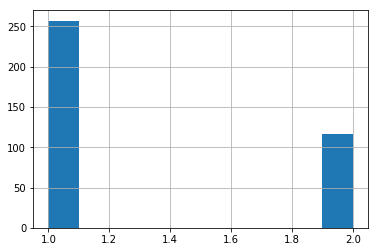

In [0]:

age1 = data.loc[data['Age'] <= 50] ['Dataset'] 
age2 = data.loc[data['Age'] > 50] ['Dataset']

age1.hist()


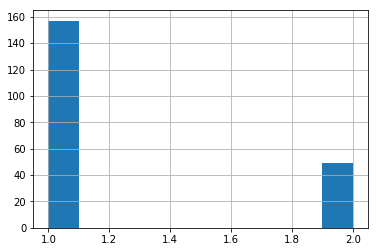

In [0]:
age2.hist()

In [0]:
print('среднее значение больных с возвратом до 50 лет - ',age1.mean())
print('среднее значение больных с возвратом после 50 лет - ',age2.mean())
print("Q2 квантиль ряда до 50 лет : ", np.quantile(age1, .50))
print("Q2 квантиль ряда  после 50 лет : ", np.quantile(age2, .50))

среднее значение больных с возвратом до 50 лет -  1.3109919571045576
среднее значение больных с возвратом после 50 лет -  1.2378640776699028
Q2 квантиль ряда до 50 лет :  1.0
Q2 квантиль ряда  после 50 лет :  1.0


**среднее значение больных в возрасте более 50 лет больше, как я понял Dataset = 1 значит человек не болен.
и квантили одинаковые, так как 50% данных в обоих выборках имеют значение**


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [0]:
Total_Bilirubin_bolnih = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(Total_Bilirubin_bolnih, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.4588588880494733, pvalue=0.014347239706774866)

T-значение 2.4, и в одновыборочном критерии мы оцениваем p-value.

p-value равно 0.014, что меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что имеется статистическое различие между Total_Bilirubin у больных людей и генеральной совокупности в целом.

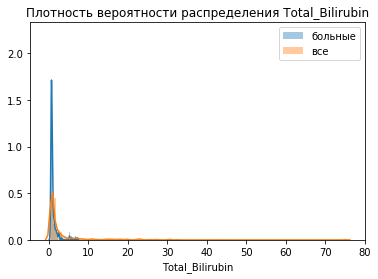

In [0]:
sns.distplot(Total_Bilirubin_bolnih)
sns.distplot(data['Total_Bilirubin'])
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['больные', 'все'])
plt.show()

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [0]:
bolnie = data[data['Dataset']==1]['Total_Bilirubin']

zdorovie = data[data['Dataset']==2]['Total_Bilirubin']

stats.ttest_ind(bolnie, zdorovie)

Ttest_indResult(statistic=5.422946004172417, pvalue=8.632557516910643e-08)

Высокий показатель t-value=5.4 и низкий показатель p-value=0 говорит о том, что группы статистически значимы.

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [0]:
restecg_0 = data[data['Age']<30]['Dataset']

restecg_1 = data[data['Age']>=30][data['Age']<=55]['Dataset']

restecg_2 = data[data['Age']>55]['Dataset']

stats.f_oneway(restecg_0, restecg_1, restecg_2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


F_onewayResult(statistic=8.966878570923486, pvalue=0.00014626095691240386)

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий между больными и здоровыми группами с разным возврастом

Вопросы задавать на почту yustiks@gmail.com